In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pathlib
from pathlib import Path
import os

In [2]:
save_folder = r'C:/Users/user/DataspellProjects/BNNproject1/fbcsp_code/first_paper_figures'

In [3]:
n_subjects = [n for n in range(1,10)]
colors = ['yellow', 'green', 'red', 'blue']
architectures = ['Ensemble', 'Isotropic Gaussian (IG)', 'IG+t-Student', 'CG+t-Student']
bar_width = 0.1

<H1> Accuracy data collection

<b>EEGNet

In [4]:
epe120_acc = [0.81, 0.69, 0.91, 0.72, 0.72, 0.74, 0.85, 0.97, 0.92]
epig_acc = [0.89, 0.74, 0.96, 0.83, 0.73, 0.715, 0.875, 0.95, 0.88]
epigt_acc = [0.84, 0.715, 0.96, 0.85, 0.72, 0.75, 0.81, 0.965, 0.90]
epcgt_acc = [0.86, 0.79, 0.95, 0.84, 0.72, 0.75, 0.84, 0.96, 0.92]

<b>Shallow ConvNet

In [5]:
spe120_acc = [0.83, 0.52, 0.90, 0.71, 0.58, 0.51, 0.69, 0.94, 0.88]
spig_acc = [0.84, 0.47, 0.965, 0.715, 0.63, 0.60, 0.82, 0.965, 0.91]
spigt_acc = [0.875, 0.47, 0.97, 0.75, 0.65, 0.60, 0.85, 0.98, 0.89]
spcgt_acc = [0.90, 0.535, 0.97, 0.75, 0.65, 0.62, 0.91, 0.99, 0.90]

<H1>Accuracy graph plotting

<b>EEGNet

Predictions

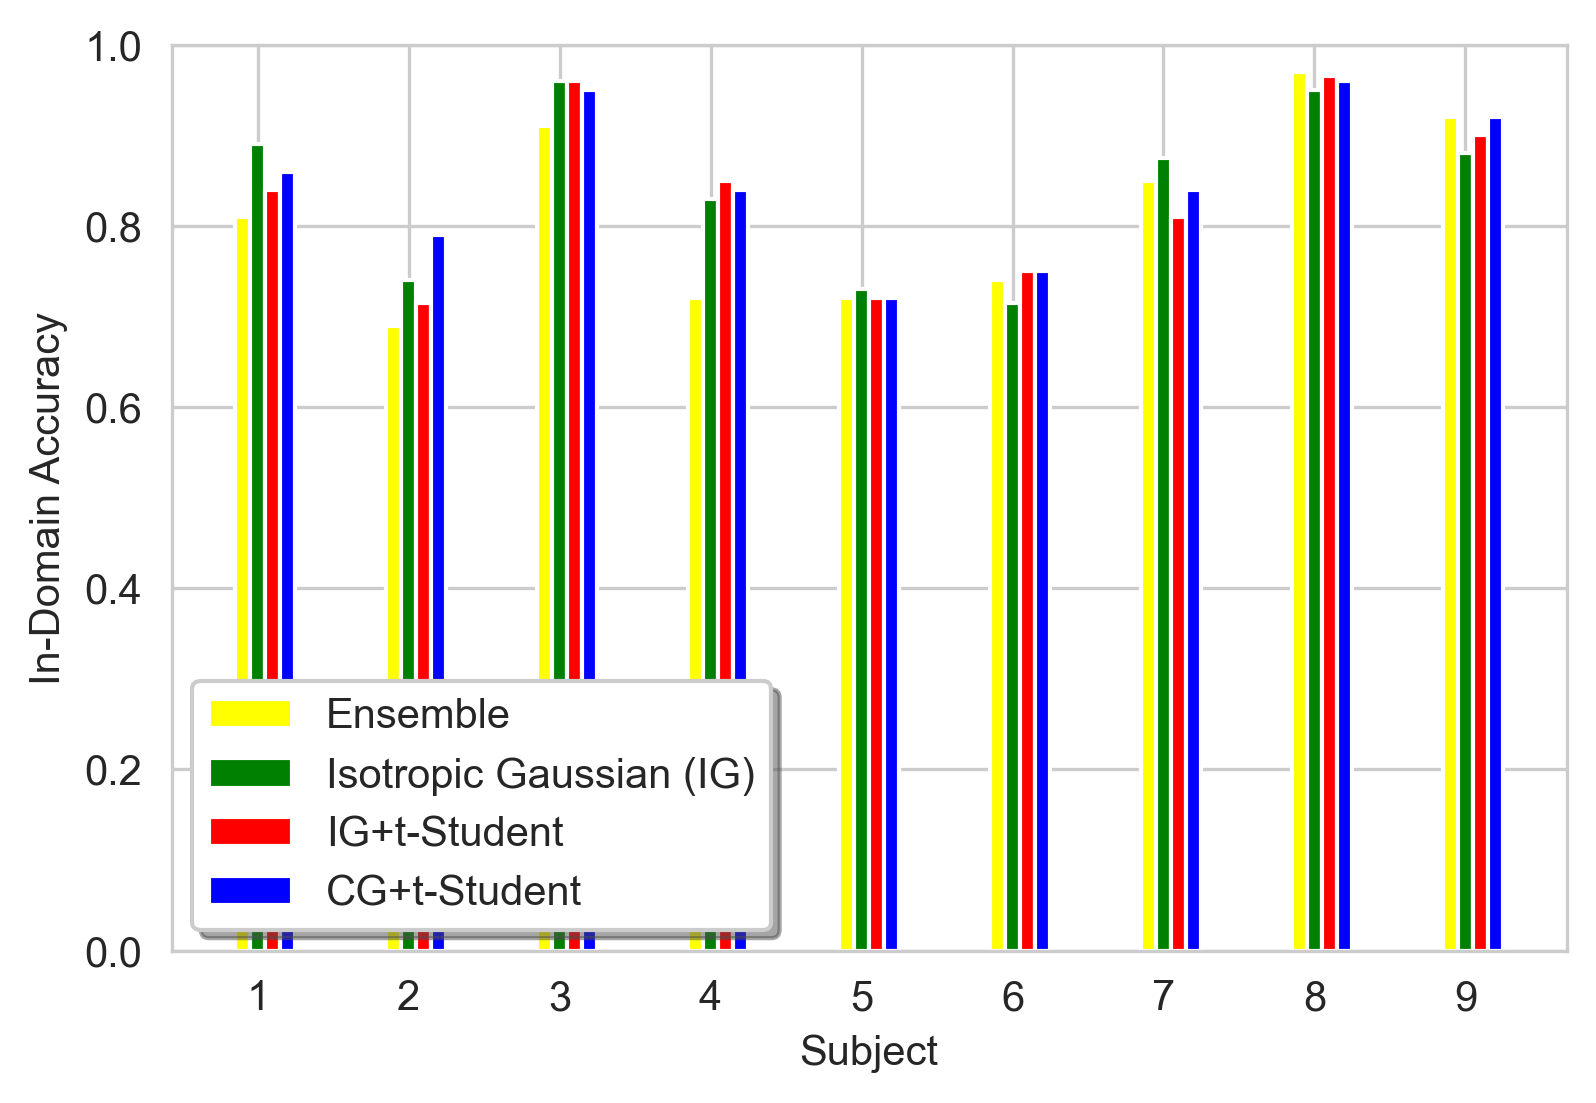

In [25]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111, xlabel='Subject', ylabel='In-Domain Accuracy')


sbp.set_ylim([0,1])

#plt.title('Accuracies (EEGNet)')

bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], epe120_acc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], epig_acc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], epigt_acc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], epcgt_acc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=3, shadow=True)

savepath = os.path.join(save_folder, 'figure_1.jpg')
fig.savefig(savepath)
plt.show()

Statistics

In [7]:
print(stats.mannwhitneyu(epe120_acc, epig_acc))
print(stats.mannwhitneyu(epigt_acc, epig_acc))
print(stats.mannwhitneyu(epcgt_acc, epig_acc))

MannwhitneyuResult(statistic=34.5, pvalue=0.6268510064599233)
MannwhitneyuResult(statistic=40.0, pvalue=1.0)
MannwhitneyuResult(statistic=42.0, pvalue=0.9295276332704805)


In [8]:
print(stats.wilcoxon(epe120_acc, epig_acc))
print(stats.wilcoxon(epigt_acc, epig_acc))
print(stats.wilcoxon(epcgt_acc, epig_acc))

WilcoxonResult(statistic=10.5, pvalue=0.1640625)
WilcoxonResult(statistic=15.0, pvalue=0.6740473527050261)
WilcoxonResult(statistic=16.5, pvalue=0.5703125)


E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Average

In [26]:
priors = [epe120_acc, epig_acc, epigt_acc, epcgt_acc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))
print(means)

[0.8144444444444444, 0.841111111111111, 0.8344444444444445, 0.8477777777777776]


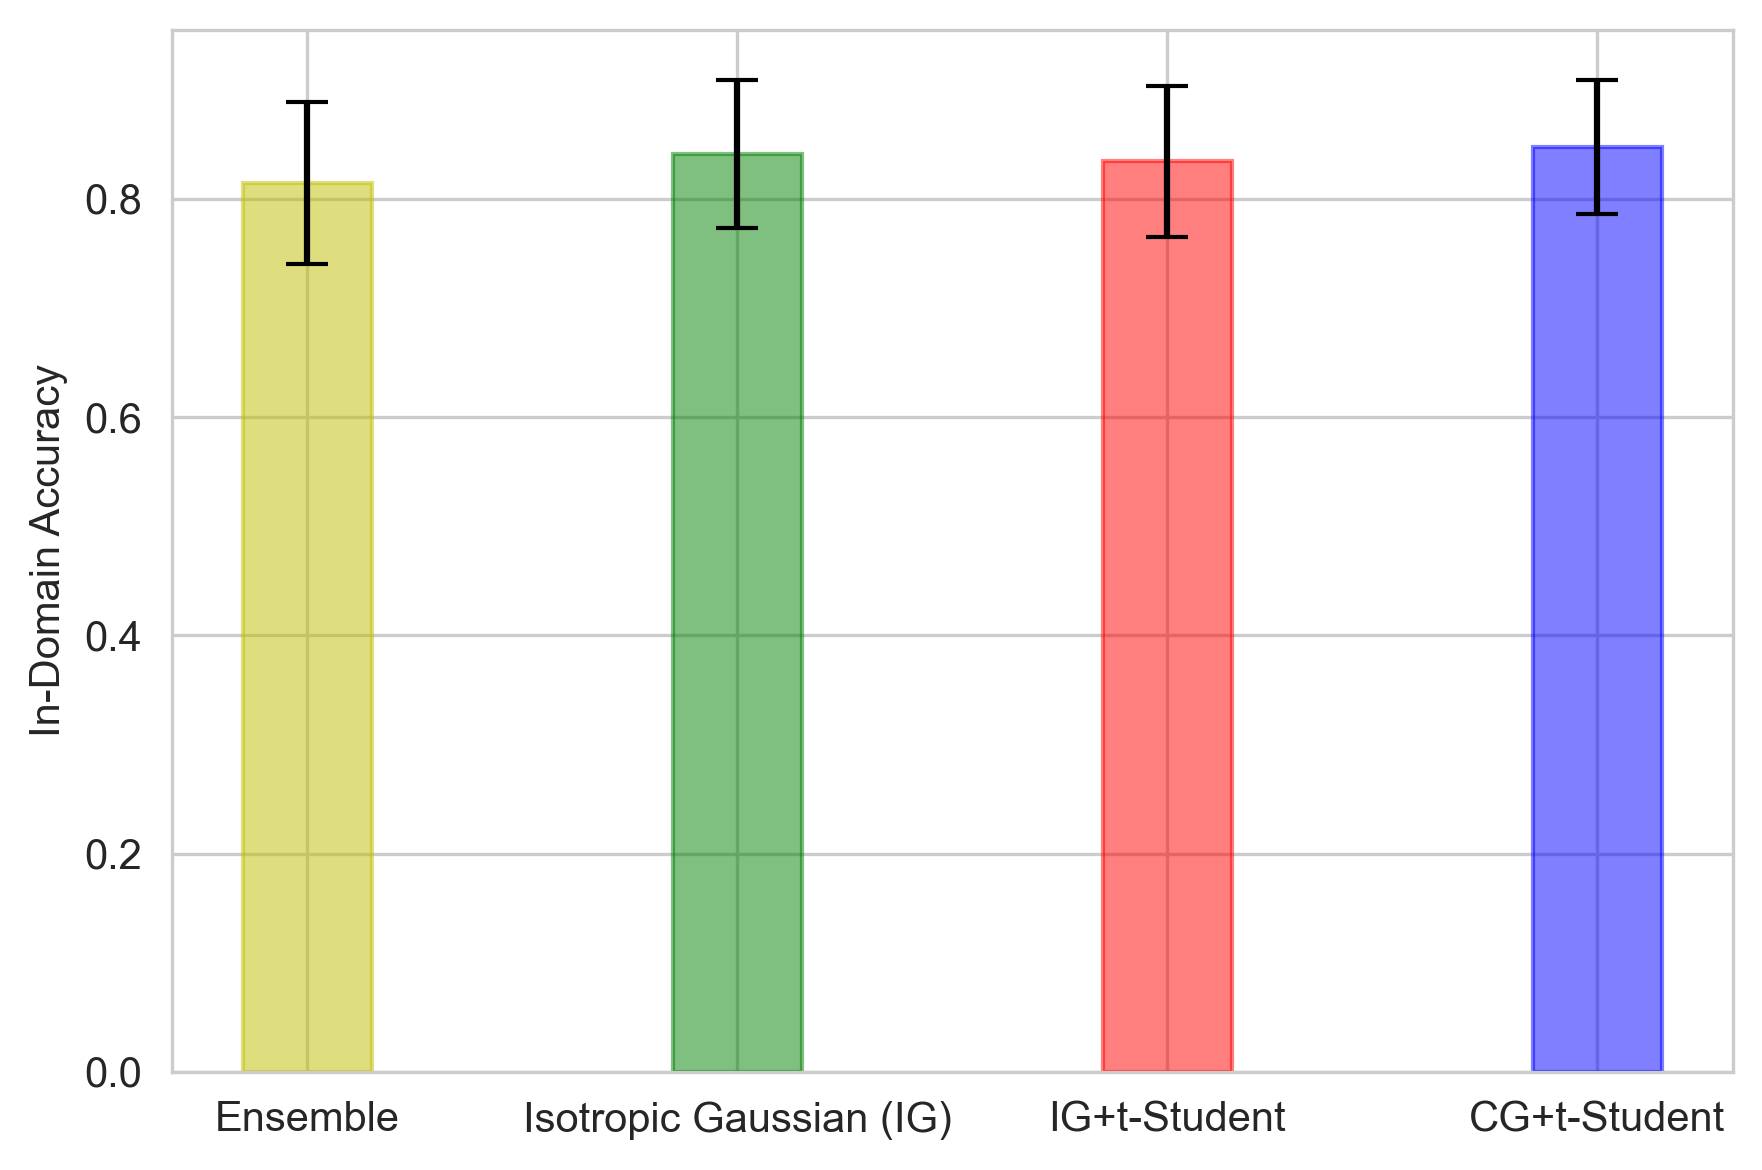

In [27]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)

barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('In-Domain Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
#ax.set_title('Average accuracy (EEGNet)')
ax.yaxis.grid(True)

plt.tight_layout()

savepath = os.path.join(save_folder, 'figure_3.jpg')
fig.savefig(savepath)
plt.show()

<b>Shallow ConvNet

Predictions

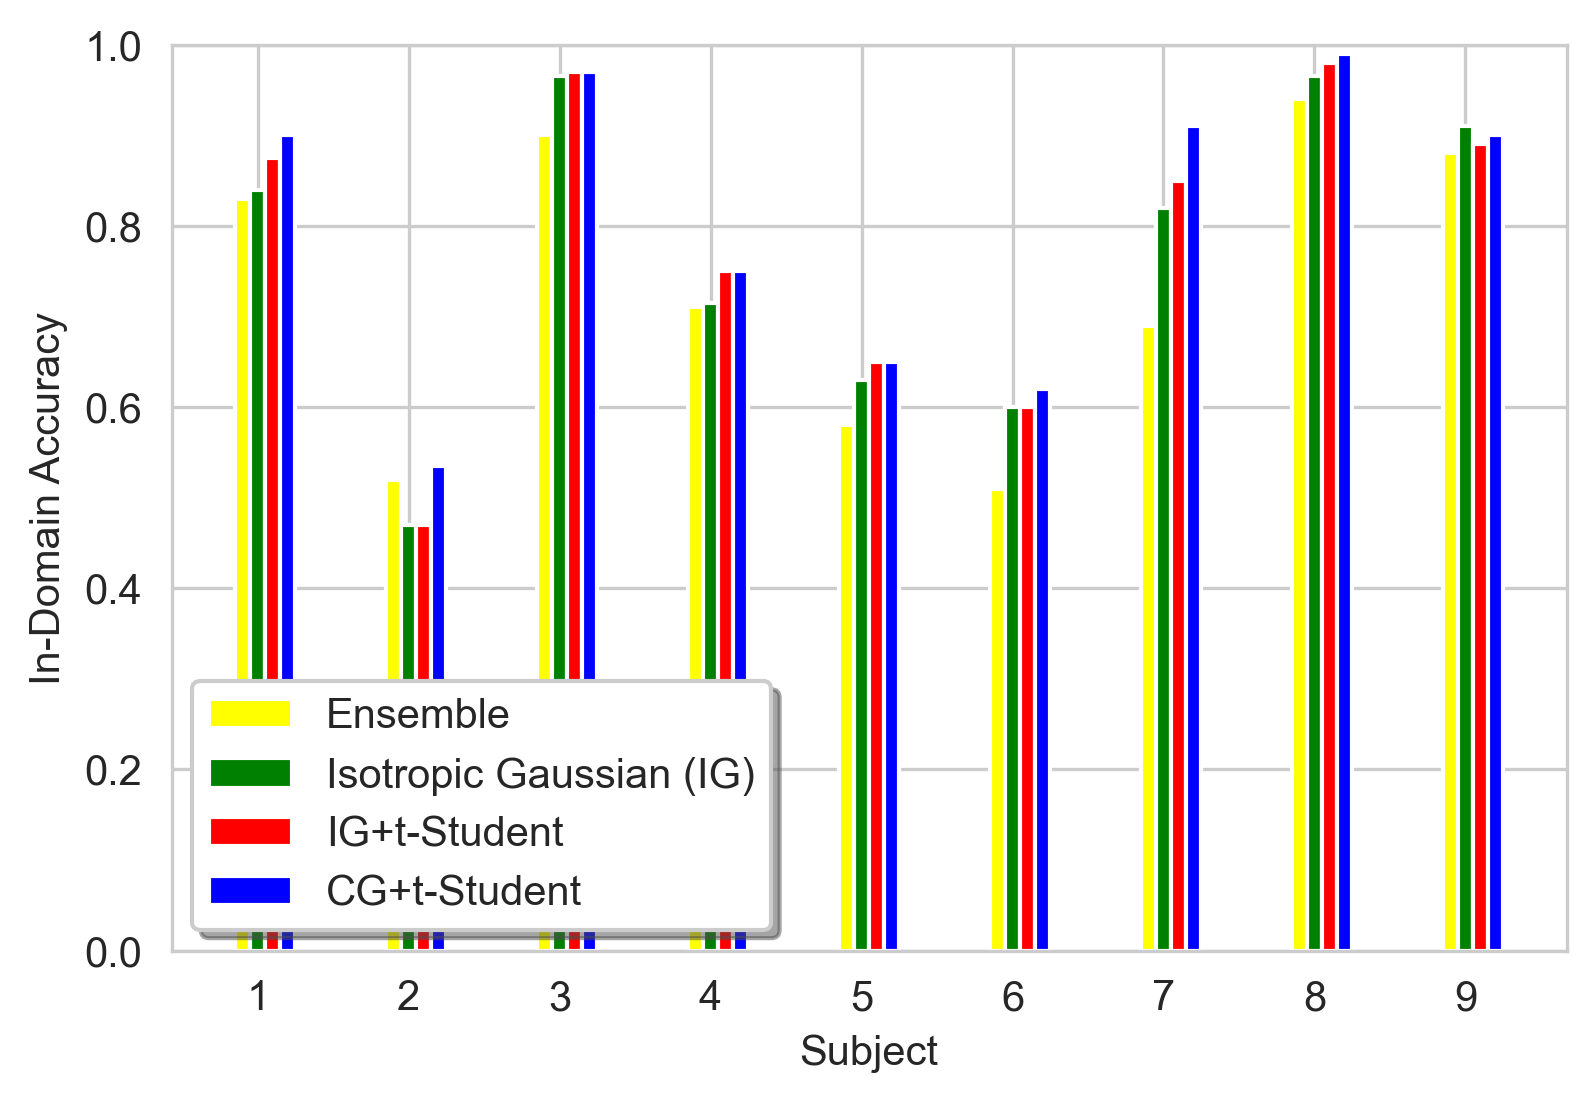

In [28]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111
                      , xlabel='Subject', ylabel='In-Domain Accuracy')


sbp.set_ylim([0,1])

#plt.title('Accuracies (Shallow ConvNet)')
bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], spe120_acc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], spig_acc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], spigt_acc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], spcgt_acc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=3, shadow=True)

savepath = os.path.join(save_folder, 'figure_2.jpg')
fig.savefig(savepath)
plt.show()

Statistics

In [14]:
print(stats.mannwhitneyu(spe120_acc, spig_acc))
print(stats.mannwhitneyu(spigt_acc, spig_acc))
print(stats.mannwhitneyu(spcgt_acc, spig_acc))

MannwhitneyuResult(statistic=33.0, pvalue=0.5362890990054856)
MannwhitneyuResult(statistic=45.0, pvalue=0.7235212531192906)
MannwhitneyuResult(statistic=46.5, pvalue=0.6266726648090295)


In [15]:
print(stats.wilcoxon(spe120_acc, spig_acc))
print(stats.wilcoxon(spigt_acc, spig_acc))
print(stats.wilcoxon(spcgt_acc, spig_acc))

WilcoxonResult(statistic=5.5, pvalue=0.0390625)
WilcoxonResult(statistic=3.5, pvalue=0.07488031404005385)
WilcoxonResult(statistic=2.0, pvalue=0.01171875)


Average

In [29]:
priors = [spe120_acc, spig_acc, spigt_acc, spcgt_acc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))


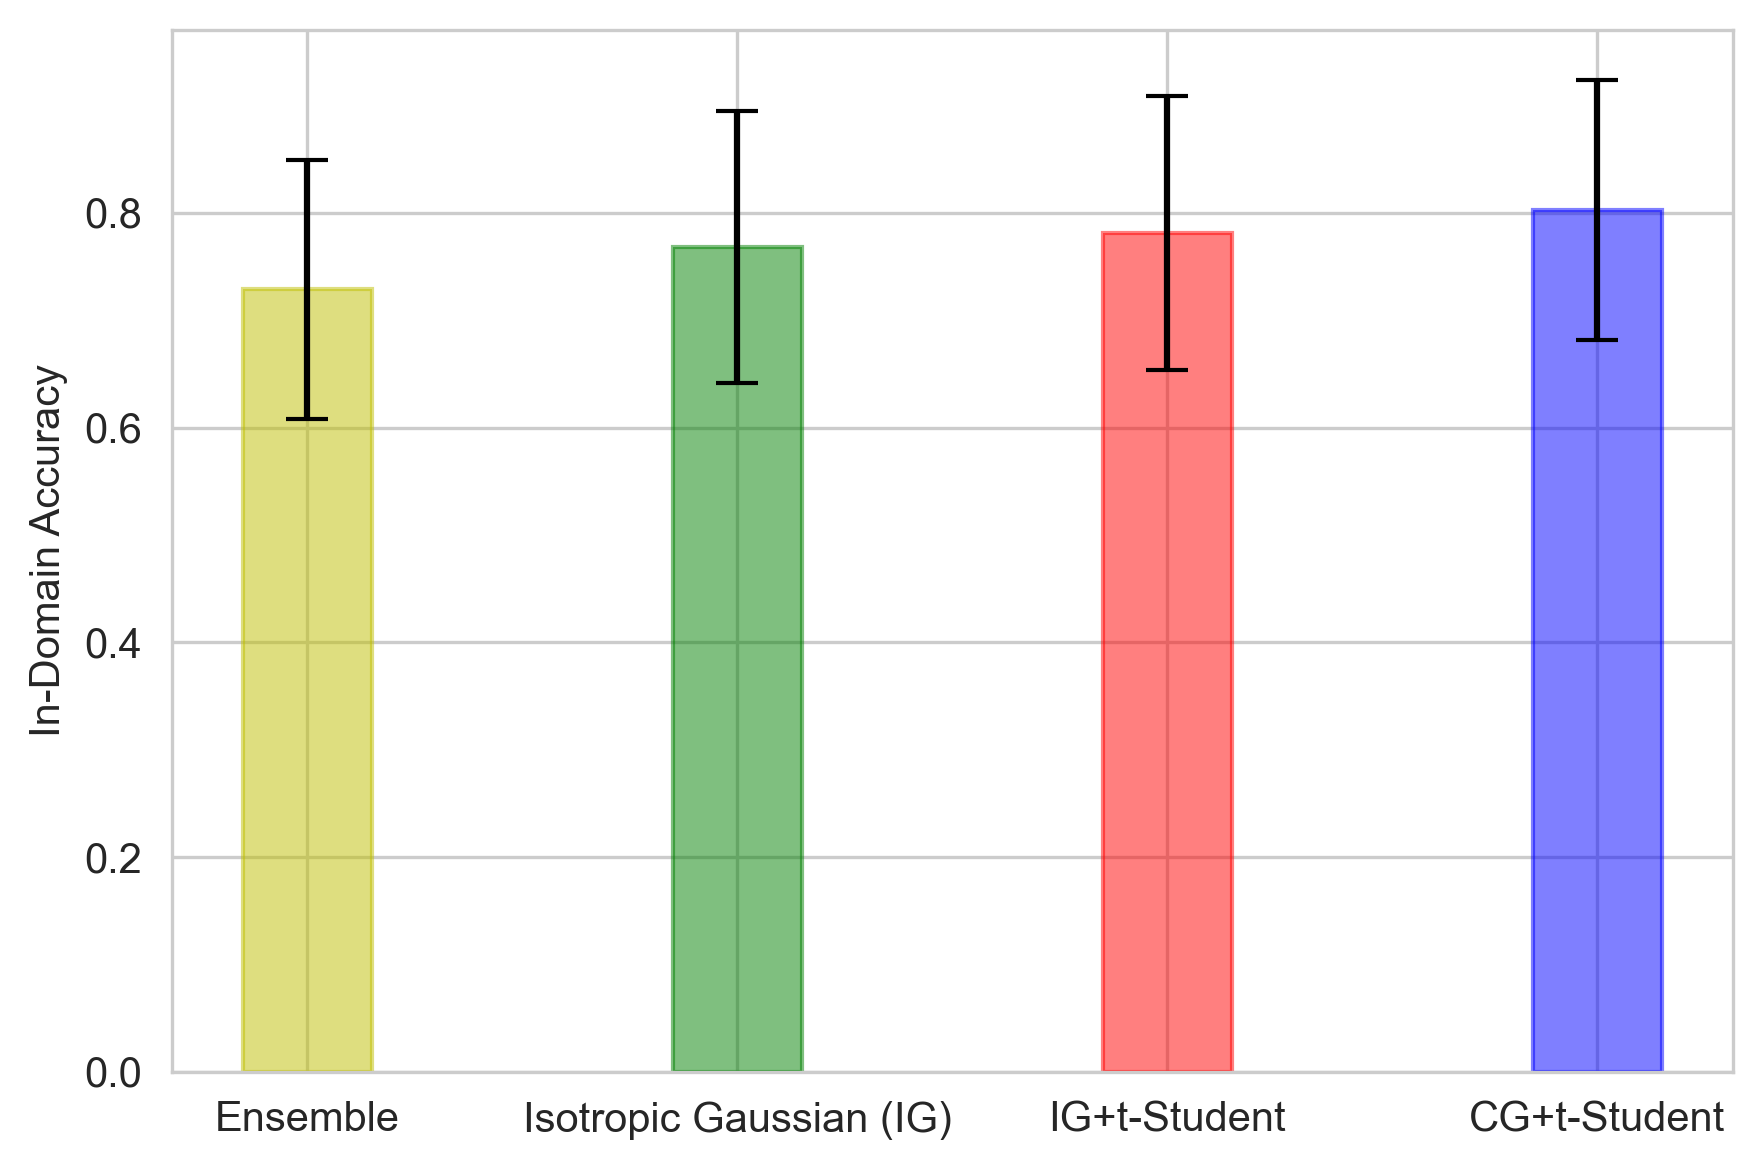

In [30]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)

barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('In-Domain Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
#ax.set_title('Average accuracy (Shallow ConvNet)')
ax.yaxis.grid(True)

plt.tight_layout()

savepath = os.path.join(save_folder, 'figure_4.jpg')
fig.savefig(savepath)
plt.show()

<H1>ROC-AUC data collection

<b>EEGNet

Logits

In [32]:
ele120_auc = [0.77, 0.52, 0.68, 0.535, 0.45, 0.56, 0.48, 0.625, 0.66]
elig_auc = [0.815, 0.51, 0.77, 0.63, 0.45, 0.53, 0.42, 0.425, 0.725]
eligt_auc = [0.87, 0.47, 0.67, 0.55, 0.46, 0.53, 0.52, 0.52, 0.71]
elcgt_auc = [0.785, 0.43, 0.75, 0.61, 0.47, 0.52, 0.47, 0.46, 0.72]

Predictions

In [33]:
epe120_auc = [0.37, 0.59, 0.56, 0.50, 0.43, 0.53, 0.53, 0.52, 0.32]
epig_auc = [0.30, 0.53, 0.71, 0.58, 0.58, 0.55, 0.68, 0.77, 0.41]
epigt_auc = [0.365, 0.60, 0.72, 0.60, 0.55, 0.56, 0.65, 0.77, 0.46]
epcgt_auc = [0.37, 0.54, 0.71, 0.61, 0.575, 0.56, 0.65, 0.76, 0.44]

<b>Shallow ConvNet

Logits

In [34]:
sle120_auc = [0.77, 0.435, 0.63, 0.47, 0.485, 0.52, 0.54, 0.51, 0.32]
slig_auc = [0.92, 0.48, 0.67, 0.55, 0.45, 0.50, 0.56, 0.33, 0.70]
sligt_auc = [0.83, 0.48, 0.60, 0.57, 0.465, 0.53, 0.46, 0.39, 0.66]
slcgt_auc = [0.89, 0.51, 0.57, 0.52, 0.44, 0.51, 0.48, 0.31, 0.67]

Predictions

In [35]:
spe120_auc = [0.83, 0.45, 0.52, 0.50, 0.52, 0.41, 0.56, 0.48, 0.38]
spig_auc = [0.22, 0.505, 0.74, 0.53, 0.49, 0.47, 0.615, 0.76, 0.41]
spigt_auc = [0.19, 0.51, 0.75, 0.55, 0.49, 0.42, 0.64, 0.78, 0.39]
spcgt_auc = [0.195, 0.48, 0.73, 0.57, 0.48, 0.46, 0.69, 0.76, 0.405]

<H1>ROC-AUC graph plotting

<b>EEGNet

Logits

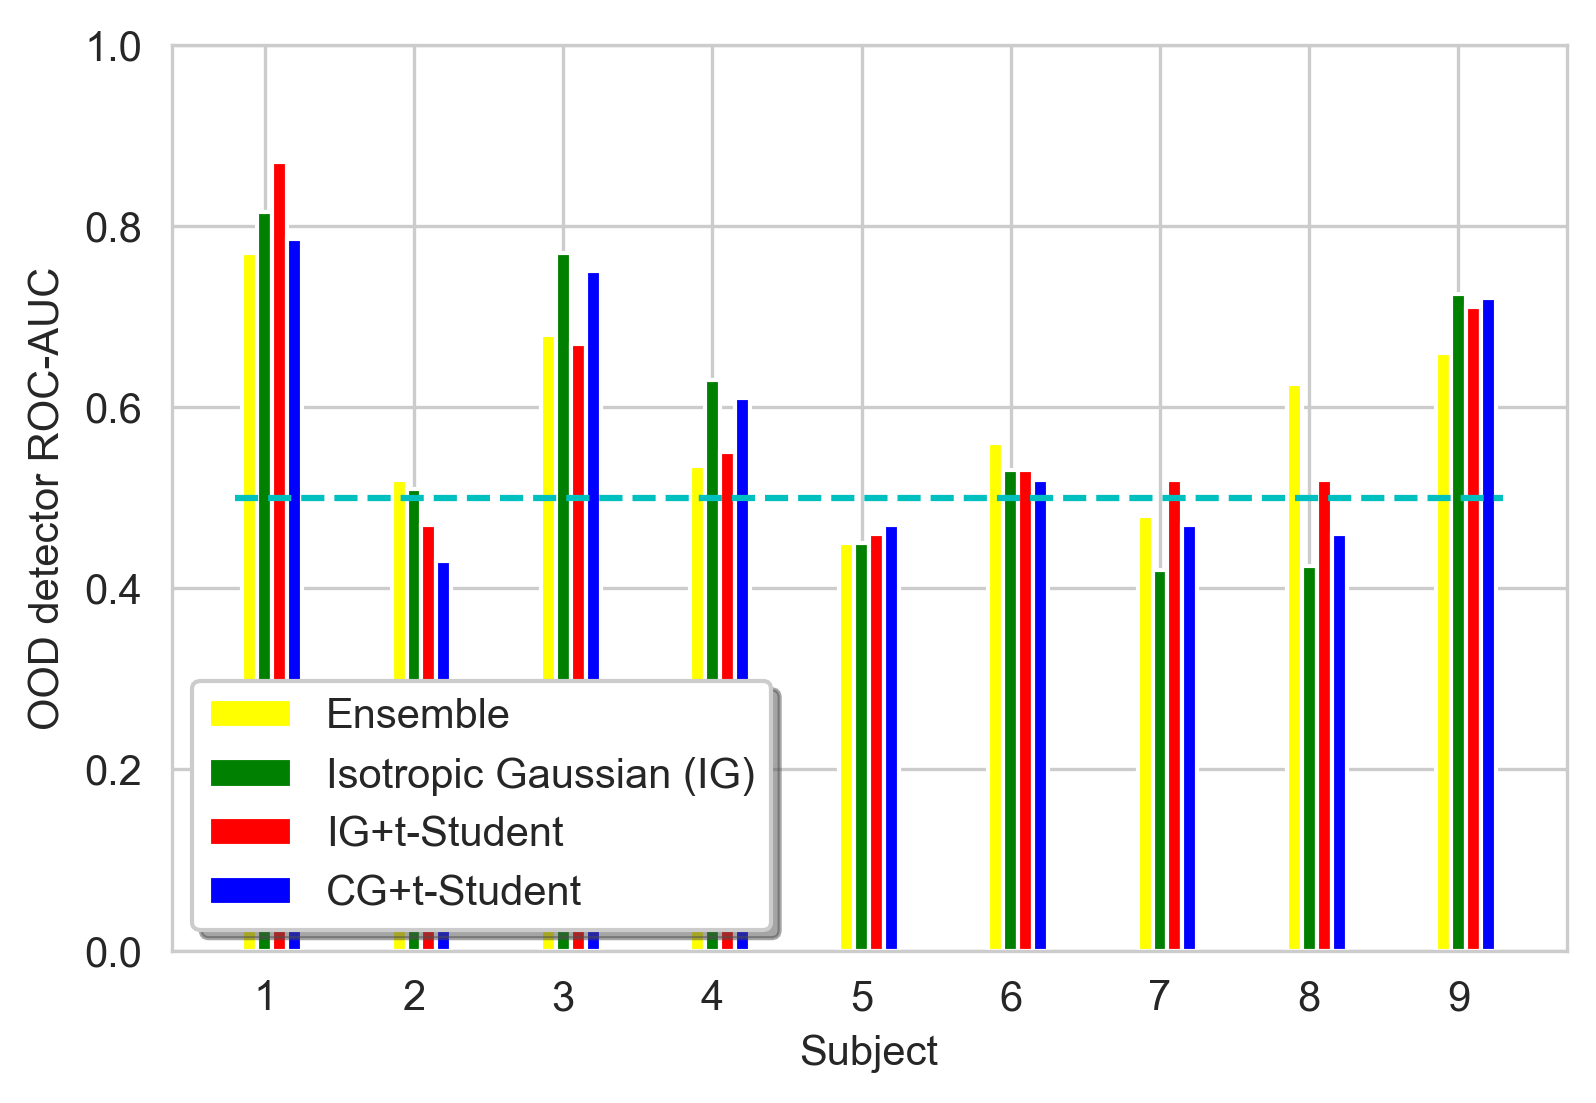

In [36]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111
                      , xlabel='Subject', ylabel='OOD detector ROC-AUC')


sbp.set_ylim([0,1])

#plt.title('logit ROC-AUC (EEGNet)')
bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], ele120_auc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], elig_auc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], eligt_auc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], elcgt_auc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.plot([0.8,9.3],[0.5,0.5], 'c--')
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=3, shadow=True)

savepath = os.path.join(save_folder, 'figure_7.jpg')
fig.savefig(savepath)
plt.show()

Statistics

In [37]:
print(stats.mannwhitneyu(ele120_auc, elig_auc))
print(stats.mannwhitneyu(eligt_auc, elig_auc))
print(stats.mannwhitneyu(elcgt_auc, elig_auc))

MannwhitneyuResult(statistic=44.0, pvalue=0.7908705881367715)
MannwhitneyuResult(statistic=44.5, pvalue=0.7570347721810652)
MannwhitneyuResult(statistic=41.0, pvalue=1.0)


In [38]:
print(stats.wilcoxon(ele120_auc, elig_auc))
print(stats.wilcoxon(eligt_auc, elig_auc))
print(stats.wilcoxon(elcgt_auc, elig_auc))

WilcoxonResult(statistic=15.0, pvalue=0.6744240722352938)
WilcoxonResult(statistic=17.0, pvalue=0.8886378608950078)
WilcoxonResult(statistic=18.0, pvalue=0.65234375)


E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Average

In [39]:
priors = [ele120_auc, elig_auc, eligt_auc, elcgt_auc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))

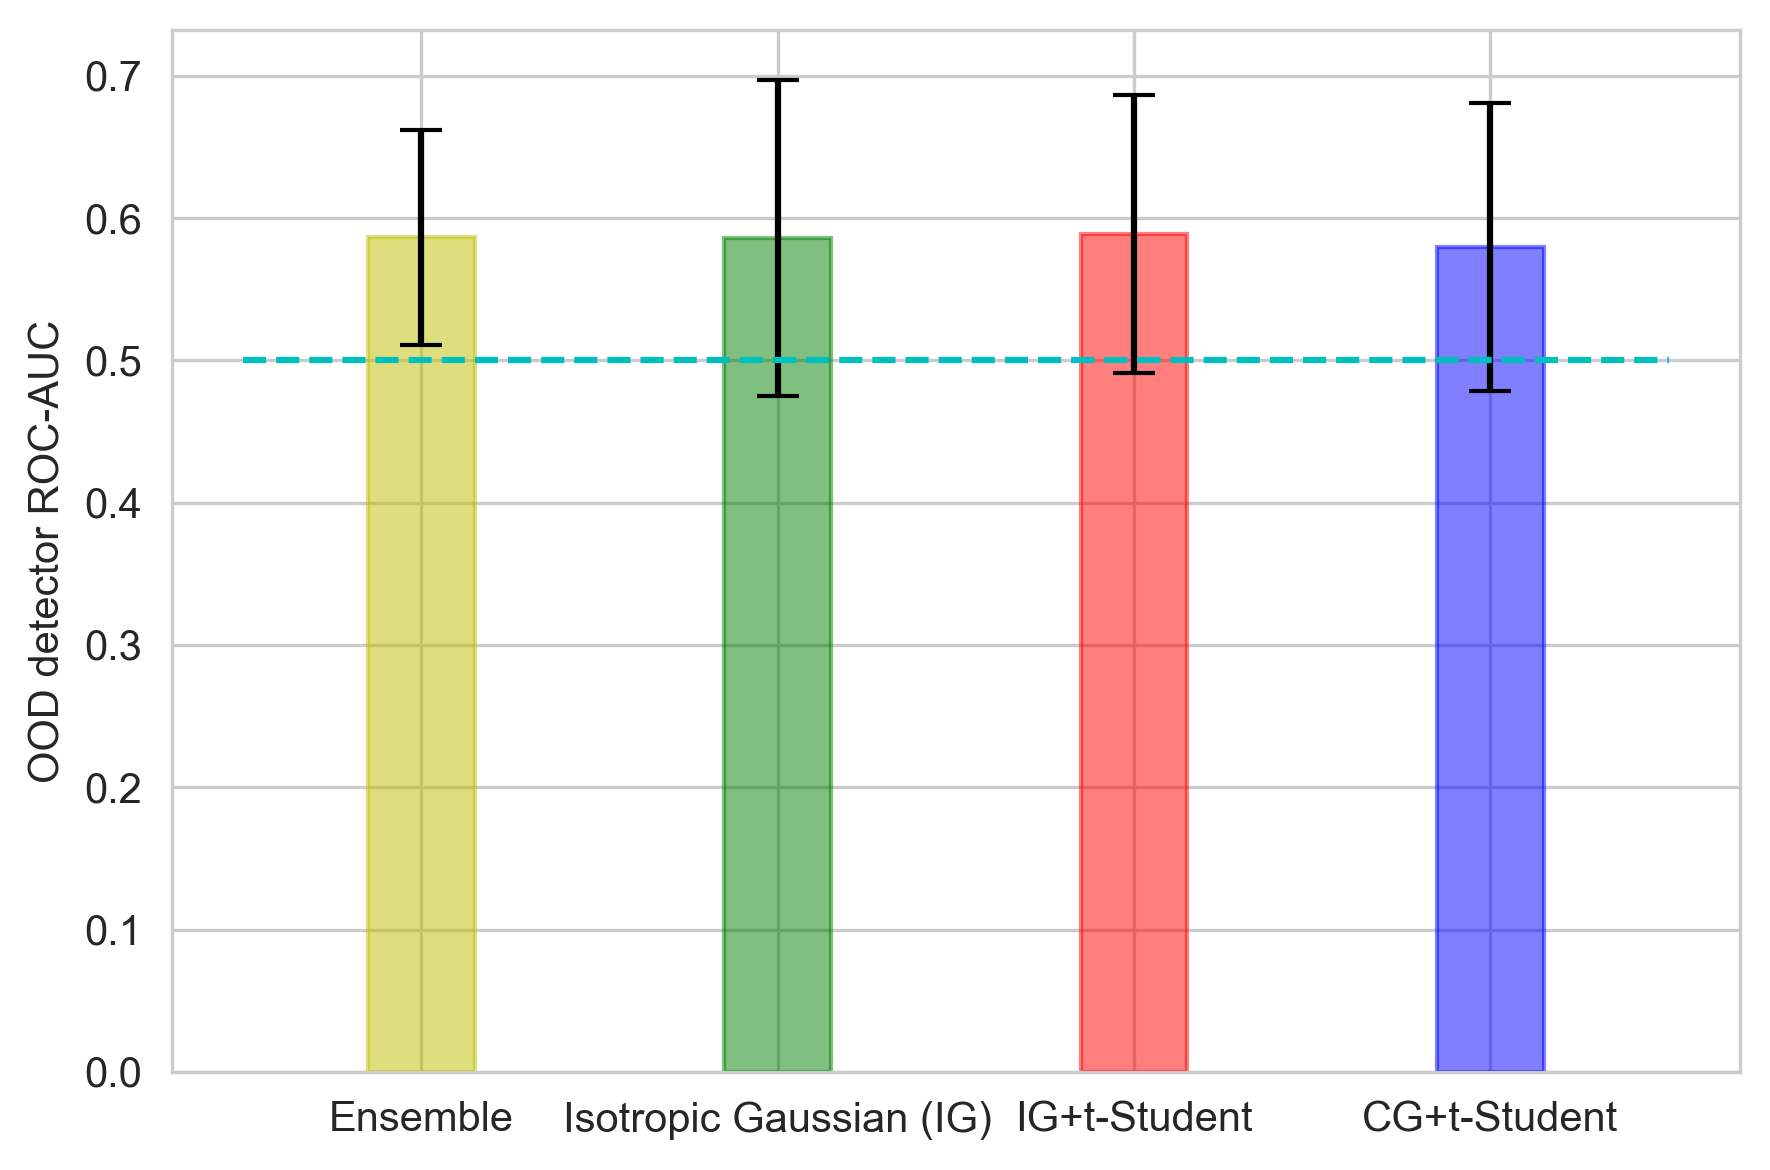

In [41]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)
barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('OOD detector ROC-AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
#ax.set_title('ROC-AUC of OOD data detector using logits (EEGNet)')
ax.yaxis.grid(True)
ax.plot([-0.5,3.5],[0.5,0.5],'c--')
plt.tight_layout()

savepath = os.path.join(save_folder, 'figure_9.jpg')
fig.savefig(savepath)
plt.show()

Predictions

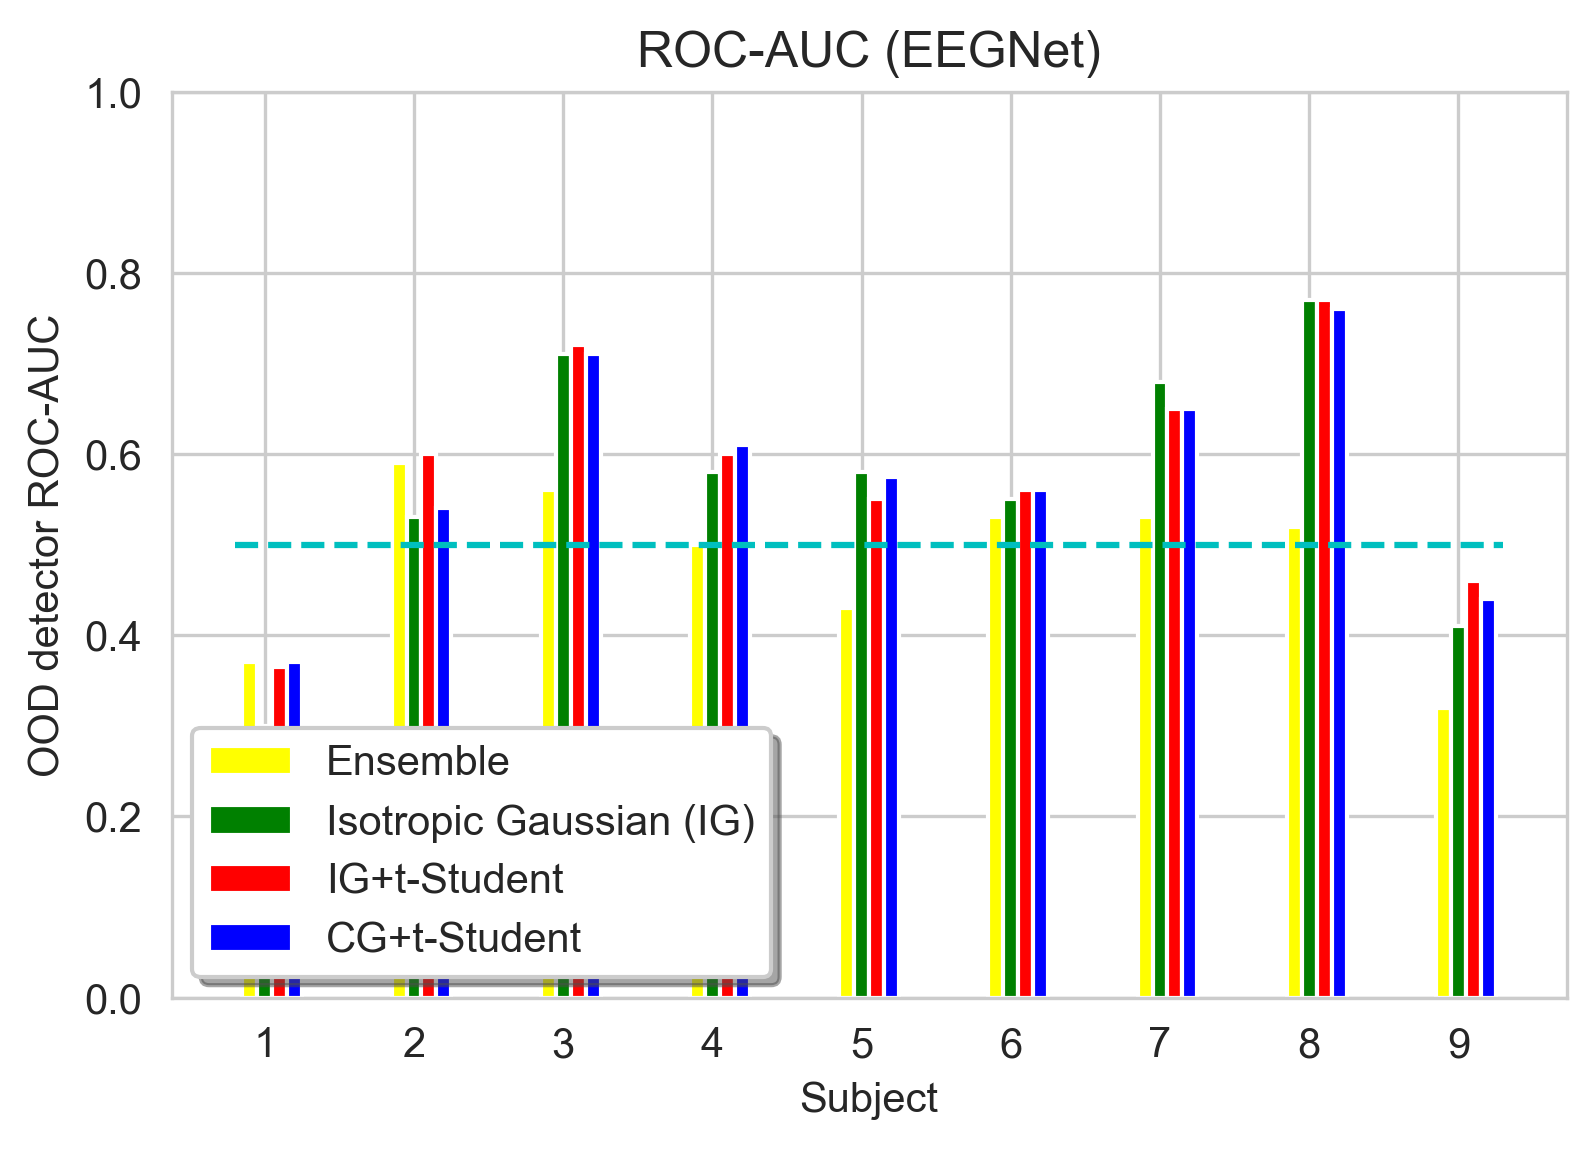

In [25]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111, title='ROC-AUC (EEGNet)'
                      , xlabel='Subject', ylabel='OOD detector ROC-AUC')


sbp.set_ylim([0,1])


bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], epe120_auc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], epig_auc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], epigt_auc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], epcgt_auc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.plot([0.8,9.3],[0.5,0.5], 'c--')
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=3, shadow=True)

Statistics

In [26]:
print(stats.mannwhitneyu(epe120_auc, epig_auc))
print(stats.mannwhitneyu(epigt_auc, epig_auc))
print(stats.mannwhitneyu(epcgt_auc, epig_auc))

MannwhitneyuResult(statistic=23.0, pvalue=0.13231774566929053)
MannwhitneyuResult(statistic=45.0, pvalue=0.723383916545185)
MannwhitneyuResult(statistic=41.5, pvalue=0.9647476023238452)


In [27]:
print(stats.wilcoxon(epe120_auc, epig_auc))
print(stats.wilcoxon(epigt_auc, epig_auc))
print(stats.wilcoxon(epcgt_auc, epig_auc))

WilcoxonResult(statistic=5.0, pvalue=0.0390625)
WilcoxonResult(statistic=9.0, pvalue=0.2070209972198611)
WilcoxonResult(statistic=10.0, pvalue=0.2578990352923395)


Average

In [28]:
priors = [epe120_auc, epig_auc, epigt_auc, epcgt_auc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))

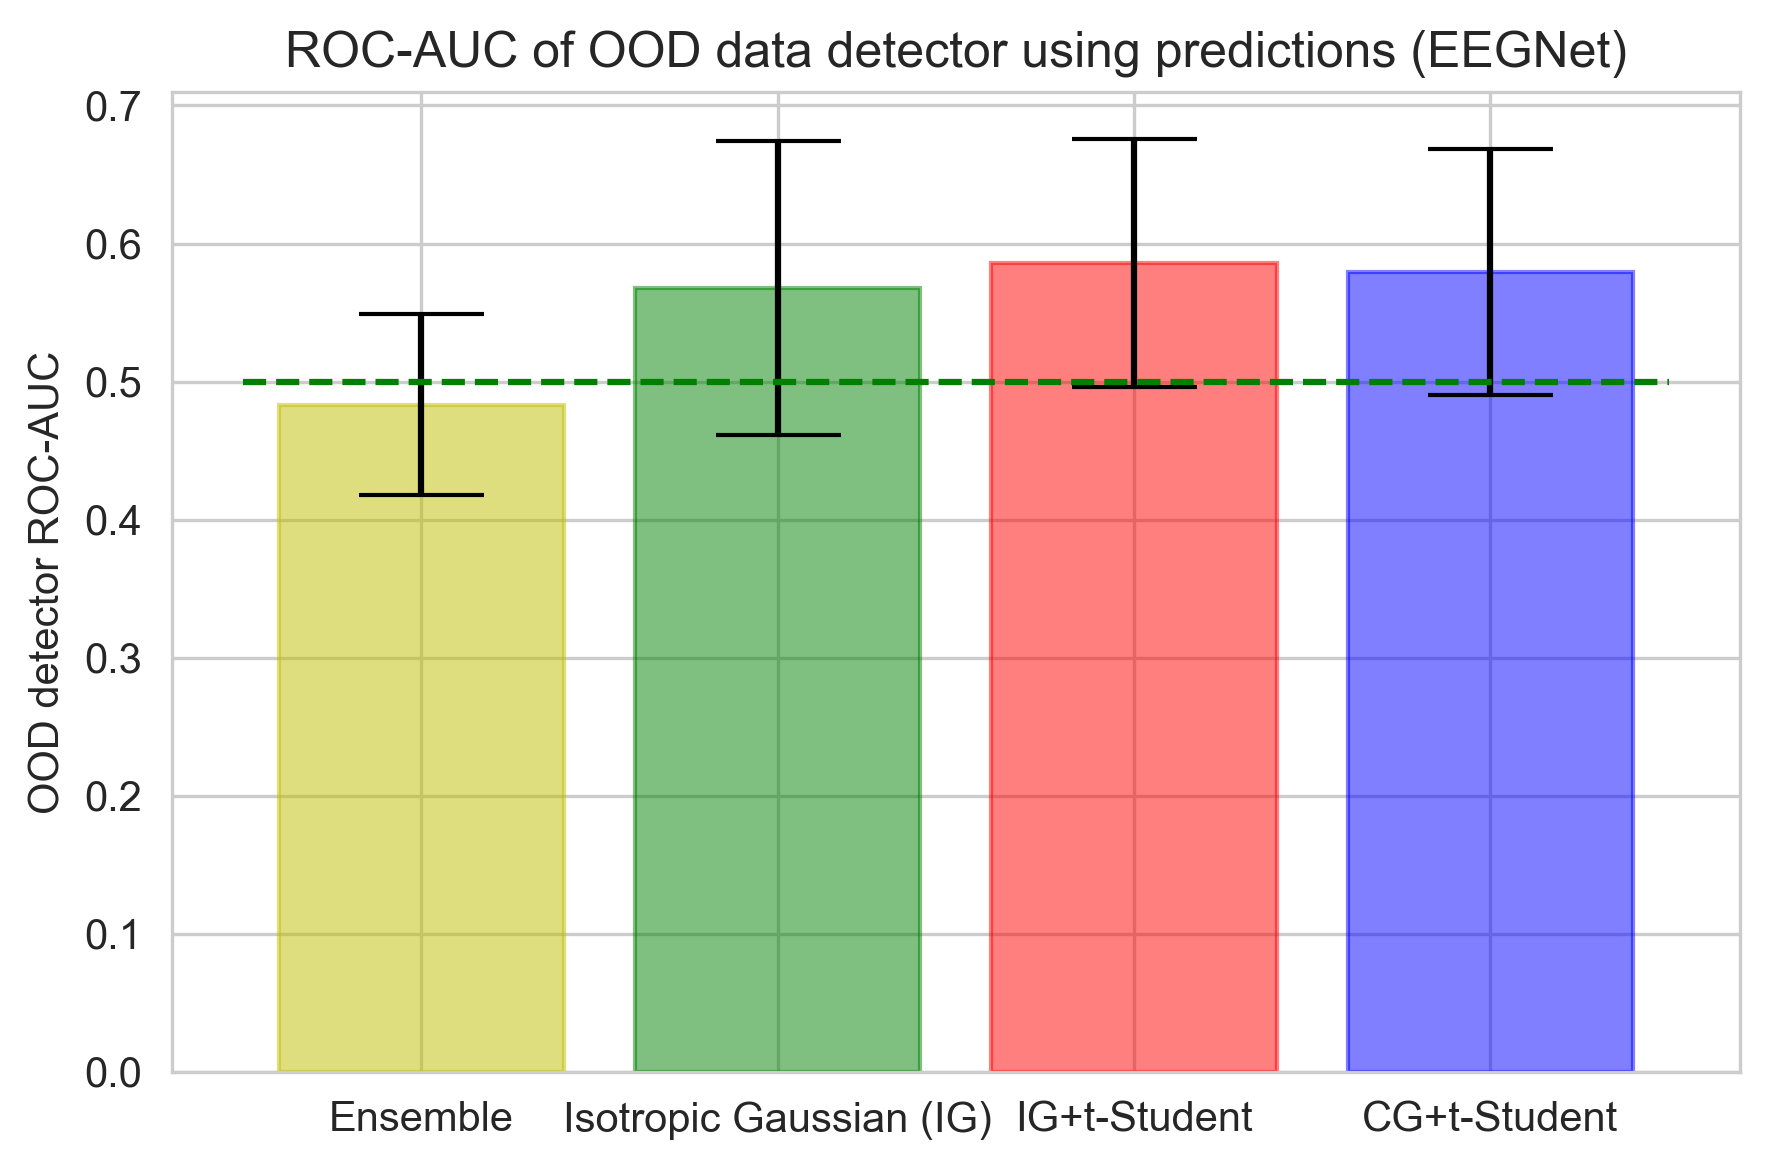

In [29]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)
barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=15)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('OOD detector ROC-AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
ax.set_title('ROC-AUC of OOD data detector using predictions (EEGNet)')
ax.yaxis.grid(True)
ax.plot([-0.5,3.5],[0.5,0.5],'g--')
plt.tight_layout()
plt.show()

<b>Shallow ConvNet

Logits

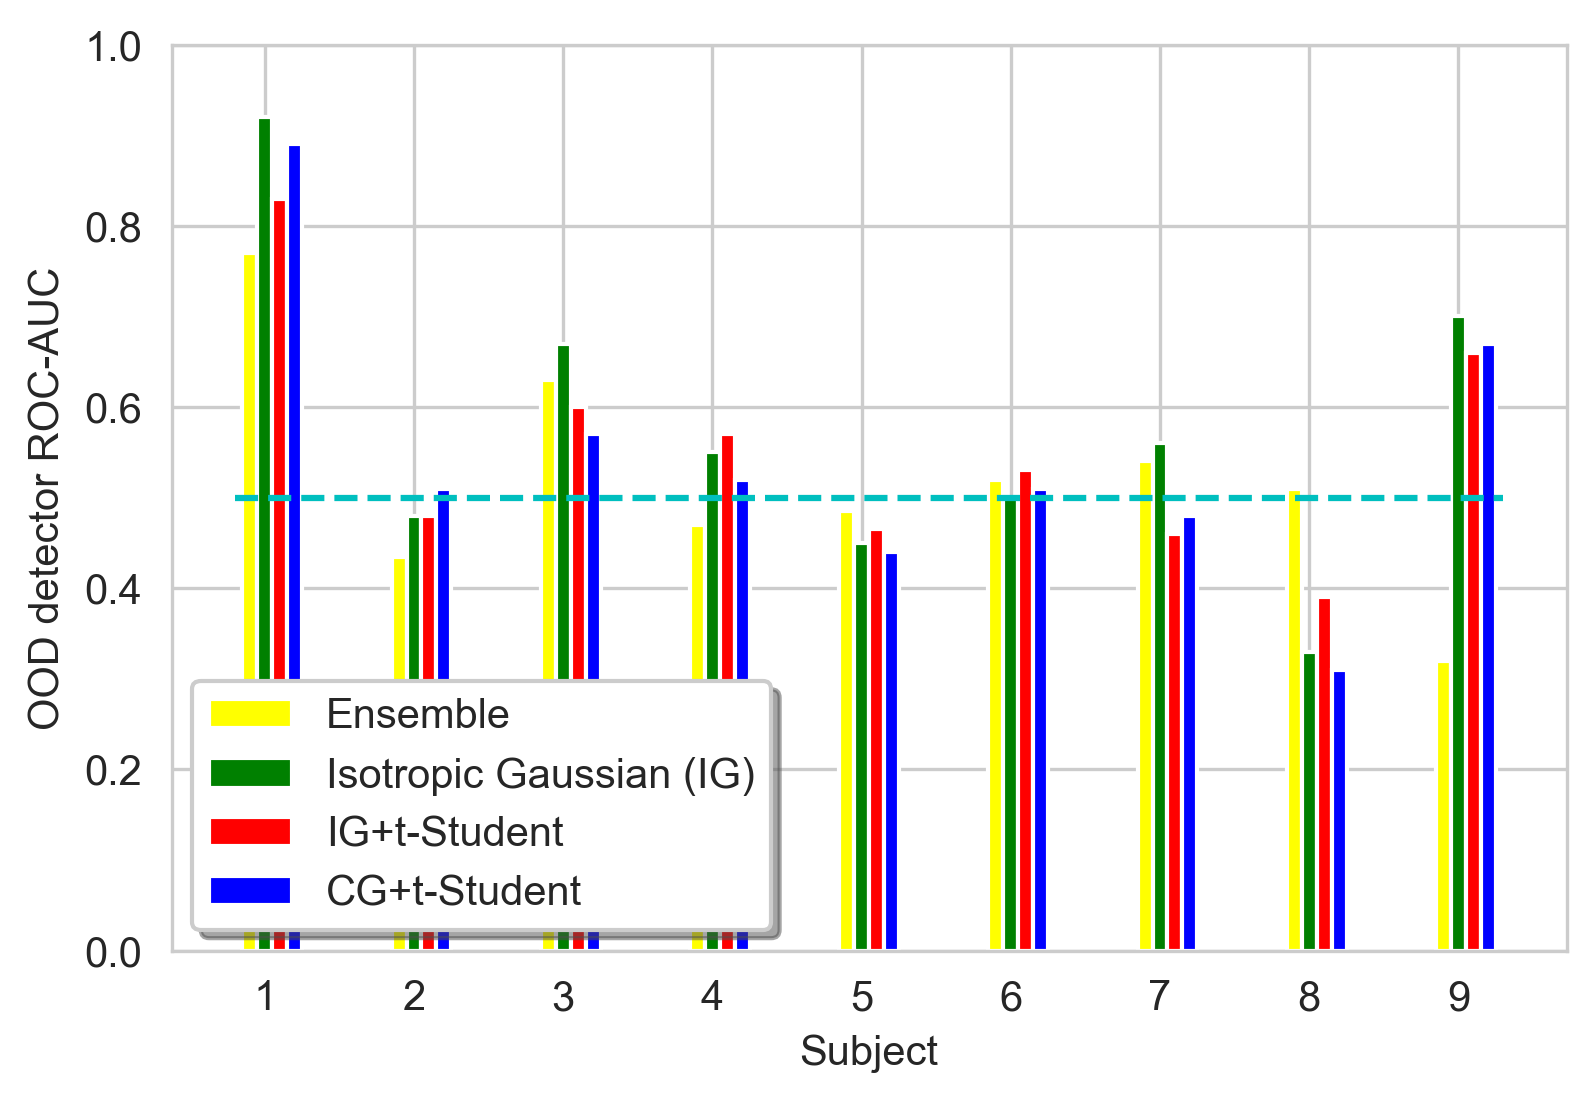

In [42]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111
                      , xlabel='Subject', ylabel='OOD detector ROC-AUC')


sbp.set_ylim([0,1])

#plt.title('logits ROC-AUC (Shallow ConvNet)')
bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], sle120_auc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], slig_auc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], sligt_auc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], slcgt_auc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.plot([0.8,9.3],[0.5,0.5], 'c--')
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=3, shadow=True)

savepath = os.path.join(save_folder, 'figure_8.jpg')
fig.savefig(savepath)
plt.show()

Statistics

In [31]:
print(stats.mannwhitneyu(sle120_auc, slig_auc))
print(stats.mannwhitneyu(sligt_auc, slig_auc))
print(stats.mannwhitneyu(slcgt_auc, slig_auc))

MannwhitneyuResult(statistic=32.0, pvalue=0.47992869214595724)
MannwhitneyuResult(statistic=37.5, pvalue=0.8251941321028358)
MannwhitneyuResult(statistic=36.0, pvalue=0.7235212531192906)


In [32]:
print(stats.wilcoxon(sle120_auc, slig_auc))
print(stats.wilcoxon(sligt_auc, slig_auc))
print(stats.wilcoxon(slcgt_auc, slig_auc))

WilcoxonResult(statistic=12.5, pvalue=0.25)
WilcoxonResult(statistic=11.0, pvalue=0.32698934959801507)
WilcoxonResult(statistic=7.5, pvalue=0.07421875)


Average

In [43]:
priors = [sle120_auc, slig_auc, sligt_auc, slcgt_auc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))

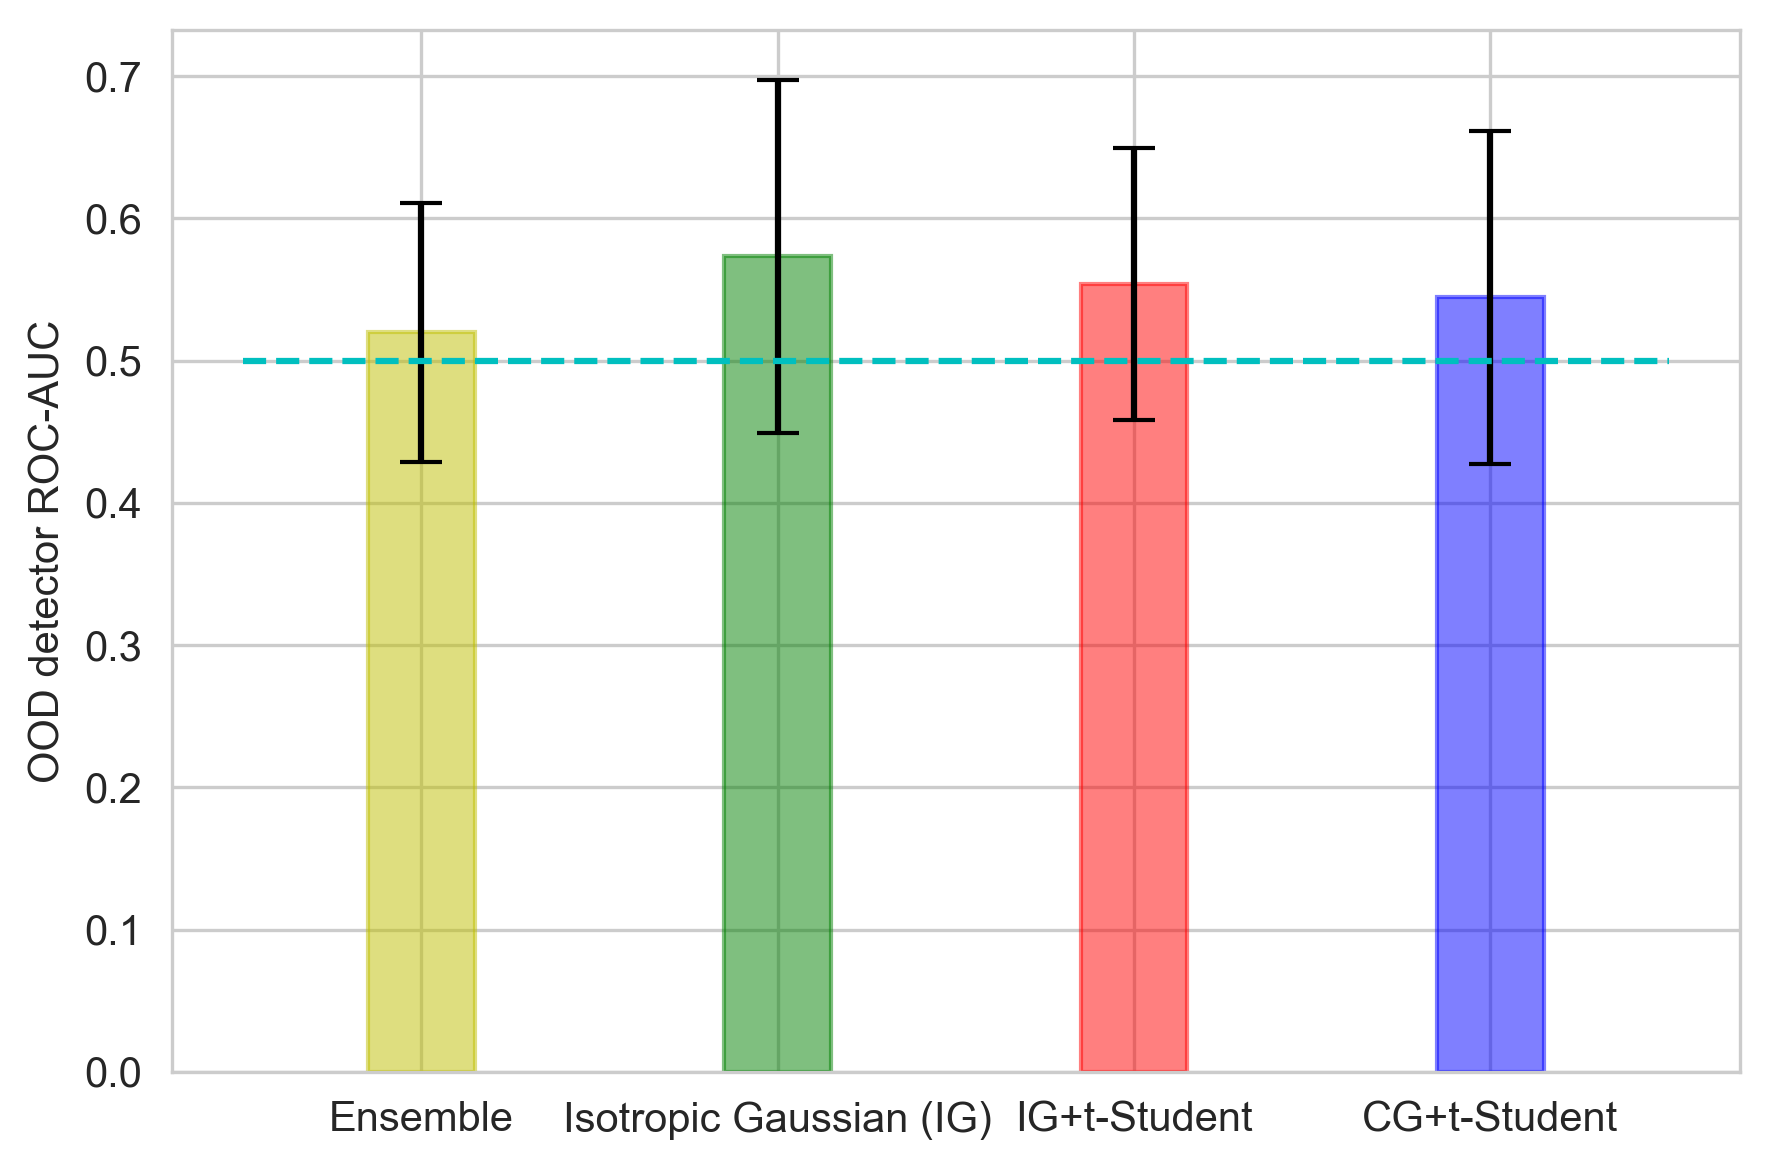

In [44]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)
barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('OOD detector ROC-AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
#ax.set_title('ROC-AUC of OOD detector using logits (Shallow ConvNet)')
ax.yaxis.grid(True)
ax.plot([-0.5,3.5],[0.5,0.5],'c--')
plt.tight_layout()

savepath = os.path.join(save_folder, 'figure_10.jpg')
fig.savefig(savepath)
plt.show()

Predictions

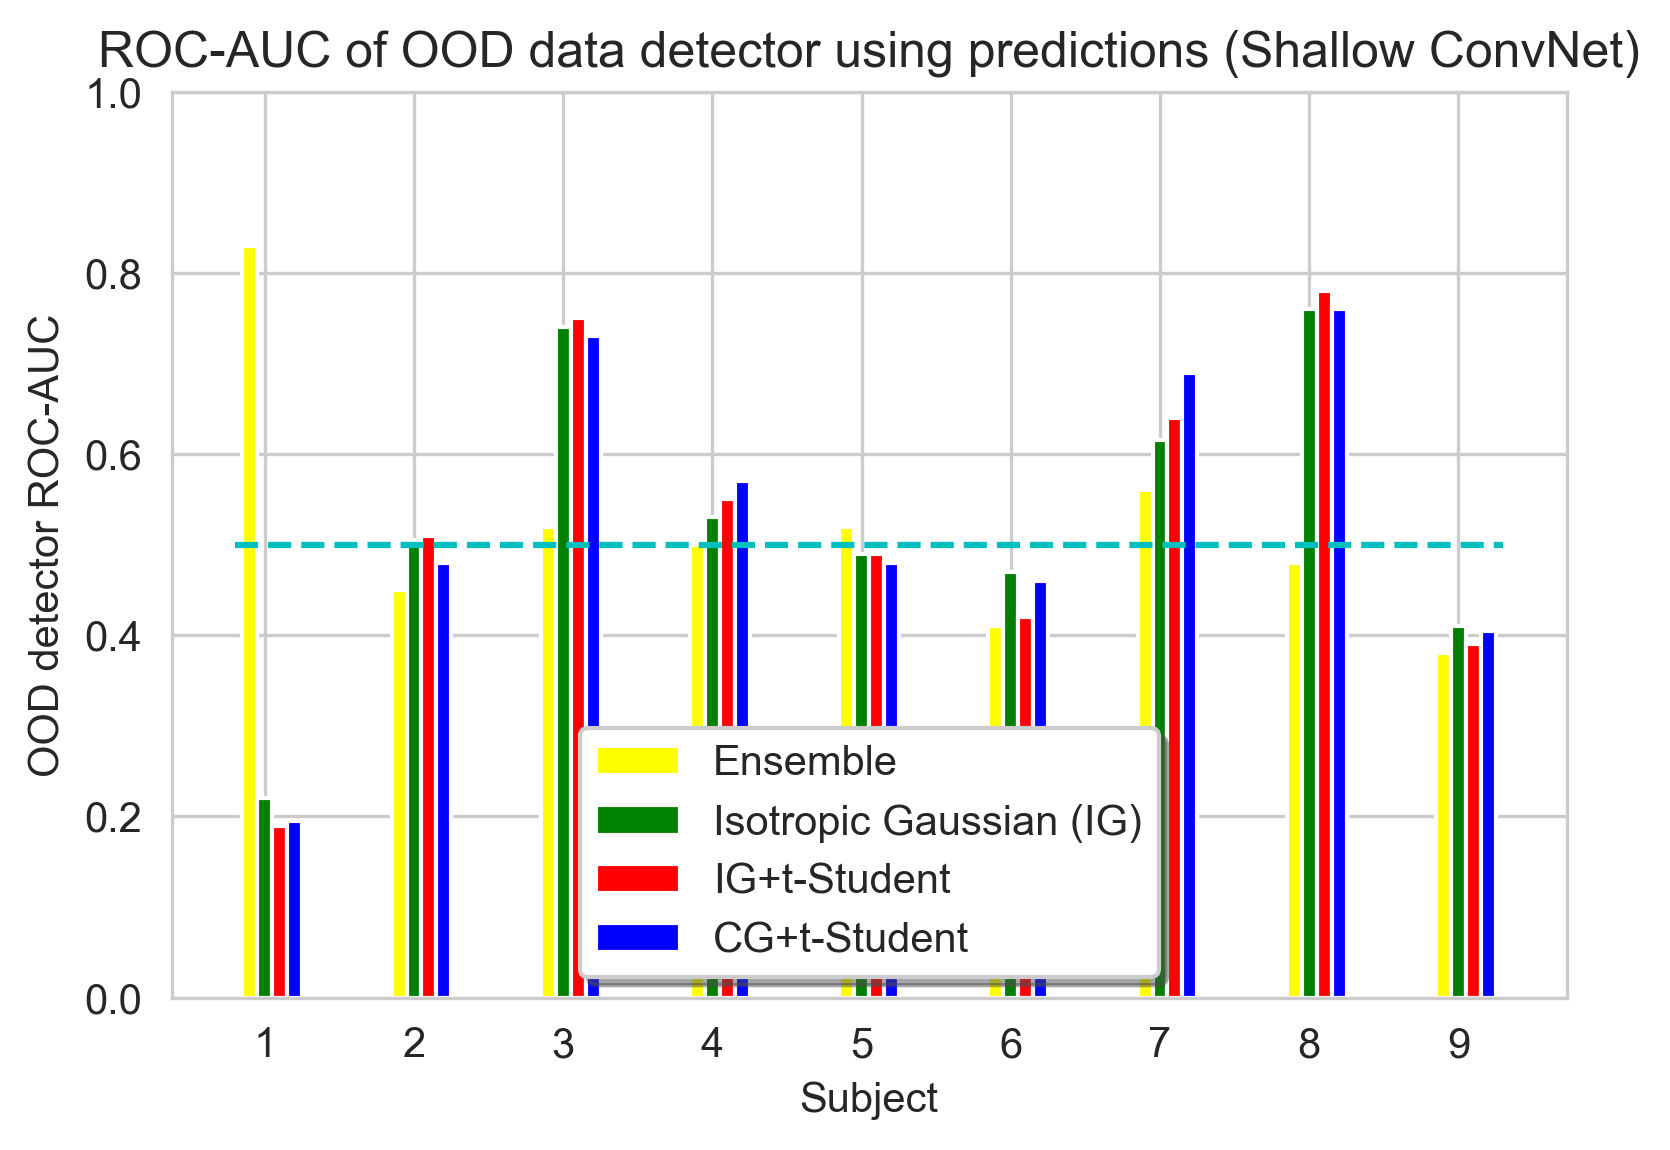

In [35]:
fig = plt.figure(dpi=300)
sbp = fig.add_subplot(111, title='ROC-AUC of OOD data detector using predictions (Shallow ConvNet)'
                      , xlabel='Subject', ylabel='OOD detector ROC-AUC')


sbp.set_ylim([0,1])


bar_1 = sbp.bar([x-1*bar_width for x in n_subjects], spe120_auc, bar_width, color=colors[0])
bar_2 = sbp.bar([x-0*bar_width for x in n_subjects], spig_auc, bar_width, color=colors[1])
bar_3 = sbp.bar([x+1*bar_width for x in n_subjects], spigt_auc, bar_width, color=colors[2])
bar_4 = sbp.bar([x+2*bar_width for x in n_subjects], spcgt_auc, bar_width, color=colors[3])
sbp.set_xticks(n_subjects)
sbp.plot([0.8,9.3],[0.5,0.5], 'c--')
sbp.legend([bar_1,bar_2,bar_3,bar_4],architectures, loc=8, shadow=True)

Statistics

In [36]:
print(stats.mannwhitneyu(spe120_auc, spig_auc))
print(stats.mannwhitneyu(spigt_auc, spig_auc))
print(stats.mannwhitneyu(spcgt_auc, spig_auc))

MannwhitneyuResult(statistic=36.5, pvalue=0.7570347721810652)
MannwhitneyuResult(statistic=41.5, pvalue=0.9647658040651848)
MannwhitneyuResult(statistic=37.5, pvalue=0.8251052307735054)


In [37]:
print(stats.wilcoxon(spe120_auc, spig_auc))
print(stats.wilcoxon(spigt_auc, spig_auc))
print(stats.wilcoxon(spcgt_auc, spig_auc))

WilcoxonResult(statistic=11.5, pvalue=0.203125)
WilcoxonResult(statistic=18.0, pvalue=1.0)
WilcoxonResult(statistic=15.0, pvalue=0.6740473527050261)


Average

In [38]:
priors = [spe120_auc, spig_auc, spigt_auc, spcgt_auc]
means = []
vars = []
crit = []
for prior in priors:
    means.append(np.mean(prior))
    vars.append(np.std(prior))
    crit.append(stats.t.ppf((1+0.95)/2, len(prior)-1,)*(np.std(prior)/np.sqrt(len(prior))))

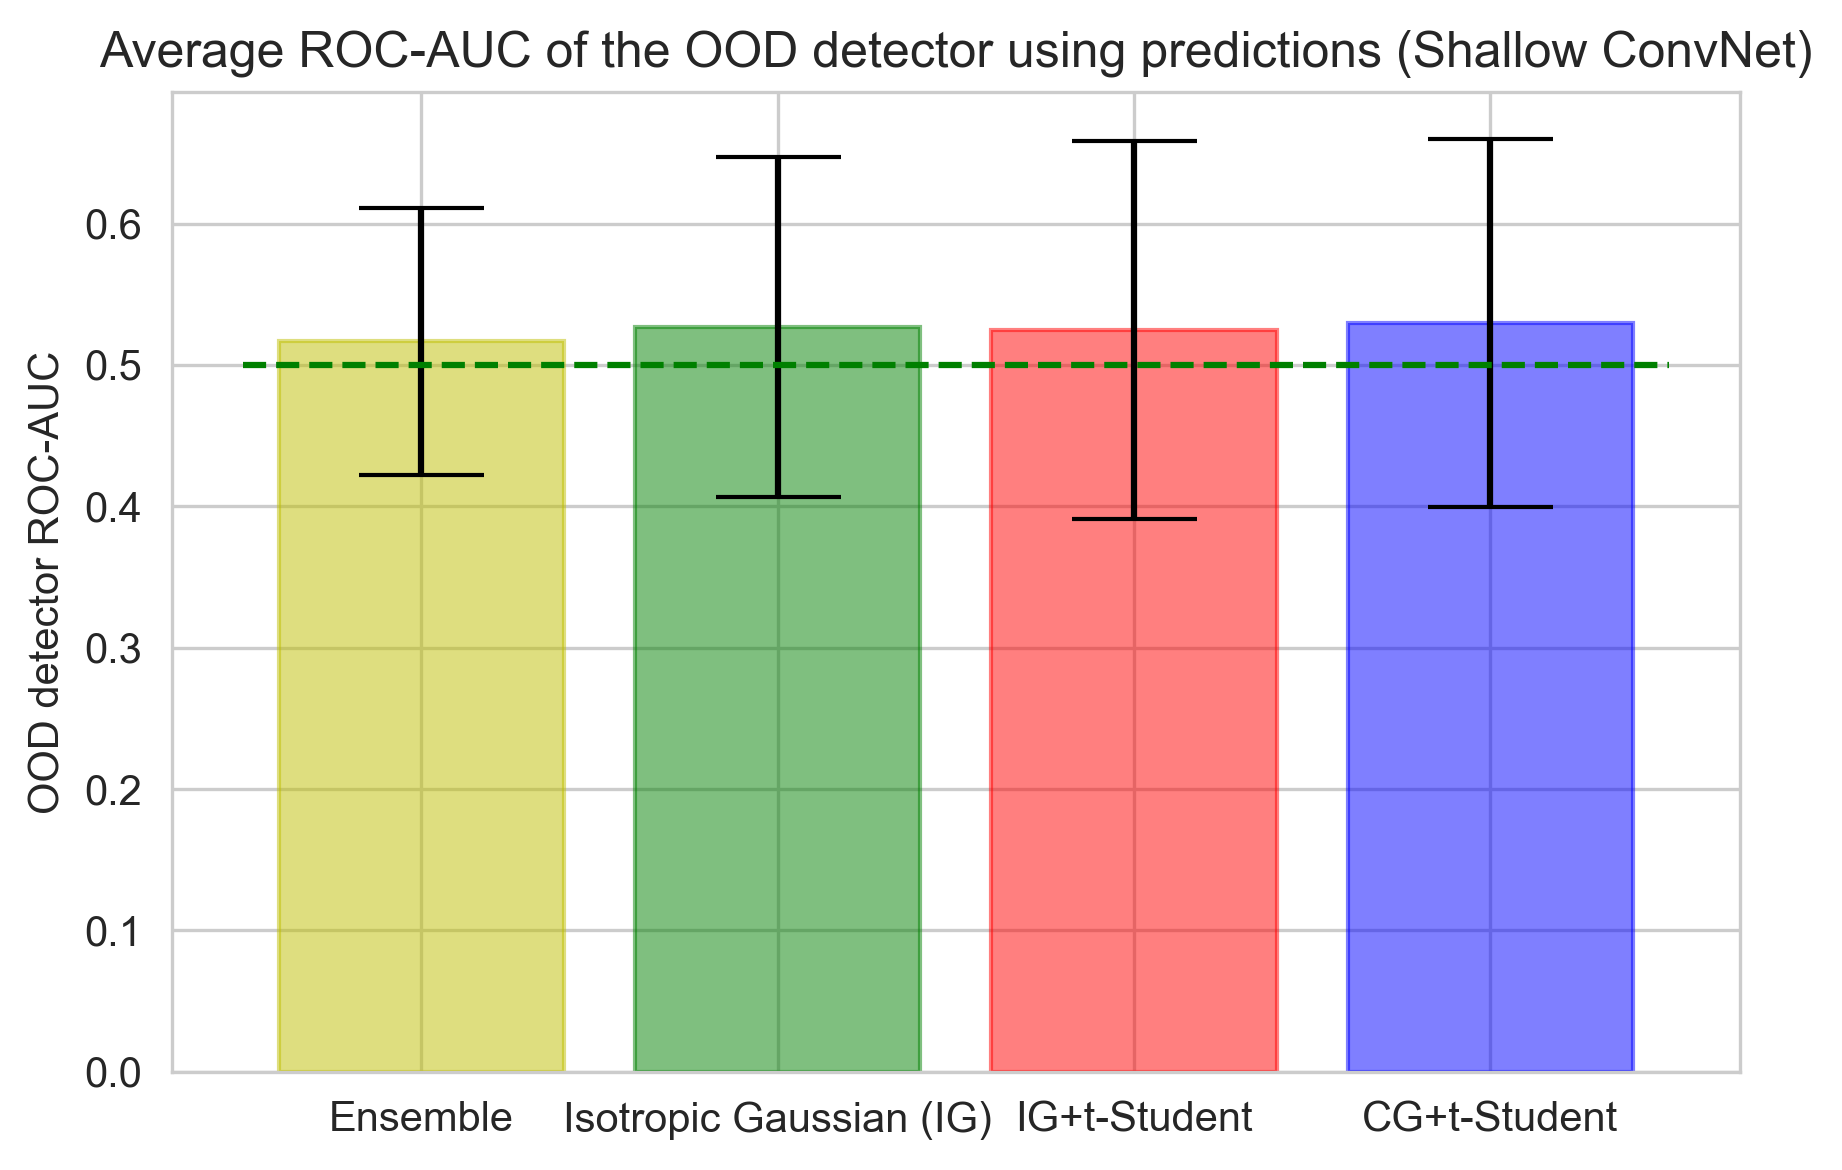

In [39]:
prior_list = architectures
x_pos = np.arange(len(prior_list))

fig, ax = plt.subplots(dpi=300)
barlist = ax.bar(x_pos, means, yerr=crit, align='center', alpha=0.5, ecolor='black', capsize=15)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('OOD detector ROC-AUC')
ax.set_xticks(x_pos)
ax.set_xticklabels(prior_list)
ax.set_title('Average ROC-AUC of the OOD detector using predictions (Shallow ConvNet)')
ax.yaxis.grid(True)
ax.plot([-0.5,3.5],[0.5,0.5],'g--')
plt.tight_layout()
plt.show()

<h1>Total ROC plotting

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path

In [40]:
def domain_split(probs, targs, domain=[0,1]):
    probs_ind = []
    probs_ood = []
    for i in range(len(targs)):
        if targs[i] in domain:
            probs_ind.append(probs[i])
        else:
            probs_ood.append(probs[i])
    return probs_ind, probs_ood

In [41]:
data_folder = Path(pathlib.Path.cwd(), 'total_var_exp_final')

In [42]:
def merge_lists_from_file(datapath, filename, merged_list):
    filepath = datapath / filename
    with open(filepath, 'r') as f:
        for line in f:
            l = line.split(',')
            #l[-1] = l[-1][:-1:]
            for n in l:
                n = float(n)
                merged_list.append(n)
    return merged_list

In [43]:
filename = 'eegnet_variances.txt'
total_variances_eegnet = []
total_variances_eegnet = merge_lists_from_file(data_folder, filename, total_variances_eegnet)

filename = 'fbcspnet_variances.txt'
total_variances_fbcspnet = []
total_variances_fbcspnet = merge_lists_from_file(data_folder, filename, total_variances_fbcspnet)

In [44]:
filename = 'eegnet_predictions.txt'
total_predictions_eegnet = []
total_predictions_eegnet = merge_lists_from_file(data_folder, filename, total_predictions_eegnet)

filename = 'fbcspnet_predictions.txt'
total_predictions_fbcspnet = []
total_predictions_fbcspnet = merge_lists_from_file(data_folder, filename, total_predictions_fbcspnet)

In [45]:
filename = 'eegnet_targets.txt'
total_targets_eegnet = []
total_targets_eegnet = merge_lists_from_file(data_folder, filename, total_targets_eegnet)

filename = 'fbcspnet_targets.txt'
total_targets_fbcspnet = []
total_targets_fbcspnet = merge_lists_from_file(data_folder, filename, total_targets_fbcspnet)

In [46]:
filename = 'eegnet_logit_variances.txt'
total_logit_variances_eegnet = []
total_logit_variances_eegnet = merge_lists_from_file(data_folder, filename, total_logit_variances_eegnet)

filename = 'fbcspnet_logit_variances.txt'
total_logit_variances_fbcspnet = []
total_logit_variances_fbcspnet = merge_lists_from_file(data_folder, filename, total_logit_variances_fbcspnet)

In [47]:
eegnet_ind_variance, eegnet_ood_variance = domain_split(total_variances_eegnet, total_targets_eegnet)
fbcspnet_ind_variance, fbcspnet_ood_variance = domain_split(total_variances_fbcspnet, total_targets_fbcspnet)

In [48]:
eegnet_ind_preds, eegnet_ood_preds = domain_split(total_predictions_eegnet, total_targets_eegnet)
fbcspnet_ind_preds, fbcspnet_ood_preds = domain_split(total_predictions_fbcspnet, total_targets_fbcspnet)

In [49]:
eegnet_ind_targets, _ = domain_split(total_targets_eegnet, total_targets_eegnet)
fbcspnet_ind_targets, _ = domain_split(total_targets_fbcspnet, total_targets_fbcspnet)

In [50]:
# FIXME for logits
eegnet_ind_logit_variance, eegnet_ood_logit_variance = domain_split(total_logit_variances_eegnet, total_targets_eegnet)
fbcspnet_ind_logit_variance, fbcspnet_ood_logit_variance = domain_split(total_logit_variances_fbcspnet, total_targets_fbcspnet)

<b> ROC-Curves plotting

In [51]:
def roc_dots_counter(vars, labels, threshold, flag='forward'):
    assert len(labels) == len(vars)
    preds = []
    tp = fp = tn = fn = 0
    for var in vars:
        if flag == 'forward':
            if var > threshold:
                preds.append(0)
            else:
                preds.append(1)
        elif flag == 'reverse':
            if var < threshold:
                preds.append(0)
            else:
                preds.append(1)
    for i in range(len(labels)):
        if labels[i] == 0 and preds[i] == 0:
            tn += 1
        elif labels[i] == 1 and preds[i] == 1:
            tp += 1
        elif labels[i] == 0 and preds[i] == 1:
            fp += 1
        elif labels[i] == 1 and preds[i] == 0:
            fn += 1
    x = fp/(tn+fp)
    y = tp/(tp+fn)
    return x, y

In [52]:
from sklearn.metrics import auc, roc_curve
def get_roc_data(ind_variances, ood_variances, t_start, t_stop, t_step=0.005, logger=None):

    variances = []
    for var in ind_variances:
        variances.append(var)
    for var in ood_variances:
        variances.append(var)
    labels = [1] * len(ind_variances)
    ood_labels = [0] * len(ood_variances)
    for label in ood_labels:
        labels.append(label)
    xs = []
    ys = []
    t = t_start
    while t < t_stop:
        x, y = roc_dots_counter(variances, labels, t)
        xs.append(x)
        ys.append(y)
        t += t_step
    a = auc(xs, ys)

    if logger is not None:
        logger.write('ROC datapoints'+'\n')
        for i, j in zip(variances, labels):
            logger.write('variance: '+str(i)+' label: '+str(j)+'\n')

    return xs, ys, a

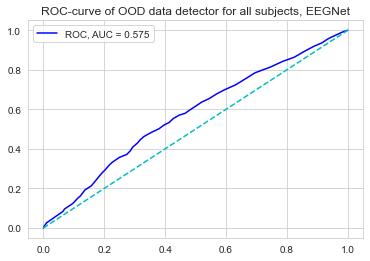

In [53]:
xs, ys, a = get_roc_data(eegnet_ind_variance, eegnet_ood_variance, -1.0, 1.0)

fig = plt.figure()
roc = fig.add_subplot(111, title='ROC-curve of OOD data detector for all subjects, EEGNet')
roc.plot(xs, ys, 'b-', label='ROC, AUC = %0.3f' % a)
roc.plot([0, 1], [0, 1], 'c--')
roc.legend()

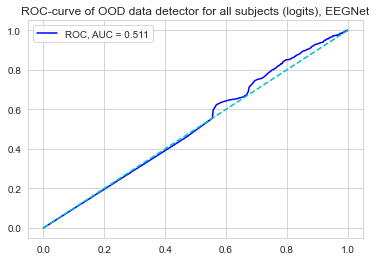

In [54]:
t_stop = max(eegnet_ind_logit_variance) if max(eegnet_ind_logit_variance)>max(eegnet_ood_logit_variance) else max(eegnet_ood_logit_variance)

xs, ys, a = get_roc_data(eegnet_ind_logit_variance, eegnet_ood_logit_variance, -1.0, t_stop, t_stop/500)

fig = plt.figure()
roc = fig.add_subplot(111, title='ROC-curve of OOD data detector for all subjects (logits), EEGNet')
roc.plot(xs, ys, 'b-', label='ROC, AUC = %0.3f' % a)
roc.plot([0, 1], [0, 1], 'c--')
roc.legend()

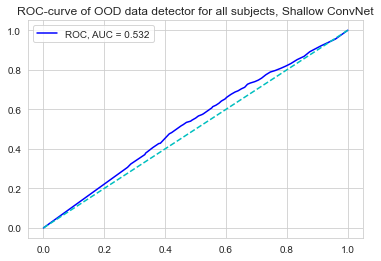

In [55]:
xs, ys, a = get_roc_data(fbcspnet_ind_variance, fbcspnet_ood_variance, -1.0, 1.0)

fig = plt.figure()
roc = fig.add_subplot(111, title='ROC-curve of OOD data detector for all subjects, Shallow ConvNet')
roc.plot(xs, ys, 'b-', label='ROC, AUC = %0.3f' % a)
roc.plot([0, 1], [0, 1], 'c--')
roc.legend()

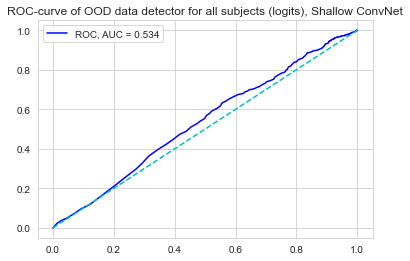

In [56]:
t_stop = max(fbcspnet_ind_logit_variance) if max(fbcspnet_ind_logit_variance)>max(fbcspnet_ood_logit_variance) else max(fbcspnet_ood_logit_variance)

xs, ys, a = get_roc_data(fbcspnet_ind_logit_variance, fbcspnet_ood_logit_variance, -1.0,  t_stop, t_stop/500)

fig = plt.figure()
roc = fig.add_subplot(111, title='ROC-curve of OOD data detector for all subjects (logits), Shallow ConvNet')
roc.plot(xs, ys, 'b-', label='ROC, AUC = %0.3f' % a)
roc.plot([0, 1], [0, 1], 'c--')
roc.legend()

Variance dist plotting